<a href="https://colab.research.google.com/github/GubioGL/Feixes_pacialmente_coerentes/blob/main/Codigo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install LightPipes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
# Importando as bibliotecas
from LightPipes import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [ ]:
# Definindo os campo e constante da Eq.32
def Lambda(M,N,sigma,delta):
  a = 1/(4*sigma**2) #
  b = 1/(2*delta**2) #
  c = 2*np.sqrt( a**2 + 2*a*b )
  L = ( np.pi/(a + b + c/2) )*( (a + b - c/2)/( a + b + c/2 ) )**( abs(M)/2 + N )
  return L

def Laguerre_G(n,m,sigma,delta):
    a = 1/(4*sigma**2) # [L]^-2
    b = 1/(2*delta**2) # [L]^-2
    c = 2*np.sqrt( a**2 + 2*a*b )
    w = np.sqrt( 2/c )

    x = np.arange(-N/2, N/2,1)*dx
    xx,yy = np.meshgrid(x,x)

    r    = np.sqrt(xx**2+yy**2)
    C    = np.sqrt(2*math.factorial(jj)/(np.pi*math.factorial(n+abs(m))))
    PL   = sp.special.assoc_laguerre(2*r**2/w**2,n,abs(m))
    Fase = np.exp(- 1j*m*np.arctan2(yy,xx) )

    LG   = C*1/w*(r*np.sqrt(2)/w)**abs(m)*PL*np.exp(-r**2/w**2)*Fase
    return LG

In [ ]:
#Parâmetros do feixe GSM
sigma = .2*mm        # largura do feixe
delta = .2*mm        # comprimento de coerência
L = 10
P = 5

lambd = 620*nm        # light wavelength
N     = 2**7          # Dimensão
dx    = 20*um         # Tamanho do pixel

# Gerando os campos para a soma incoerente
Numero_de_Soma_Inc = (2*L+1)*(P+1)
Campo =  np.exp( 1j*np.zeros((N,N,Numero_de_Soma_Inc))) # Campo

i = 0
for j in range(-L,L+1):
  for jj in range(P+1):
    Campo[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*Laguerre_G(n=jj,m=j,sigma=sigma,delta=delta)
    i += 1


<ipython-input-6-da6ffd8e505c>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[ii,jj] = np.sum(np.conj(Campo[ii,jj,:])*Campo[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])


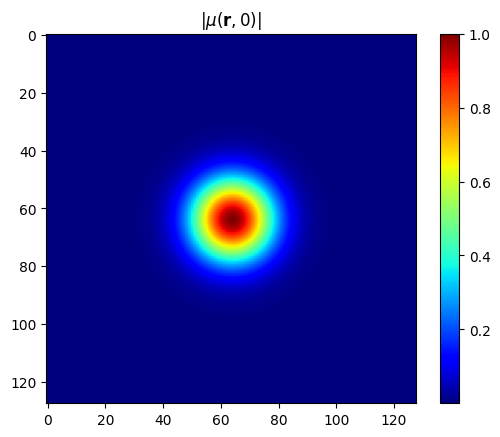

In [ ]:
x = np.arange(-N/2, N/2,1)*dx
xx,yy = np.meshgrid(x,x)
ref = [0,0]
index = np.where((xx==ref[0])*(yy==ref[1])==True)

mu = np.zeros_like(Campo[:,:,1])
intMap = np.sum(abs(Campo)**2,2)

for ii in range(0,N):
    for jj in range(0,N):
      mu[ii,jj] = np.sum(np.conj(Campo[ii,jj,:])*Campo[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu)
img = img/img.max()

plt.imshow(img,cmap = "jet");
plt.title('|$\mu(\mathbf{r},0)$|');
plt.colorbar();
plt.show()